In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities_list = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities_list:
        cities_list.append(city)

# Create a dataframe with list of cities
cities = pd.DataFrame(cities_list)

# Rename column with list of cities
cities.columns = ["City"]

# Add columns for the pertinent data
cities["Lat"] = ""
cities["Temp"] = ""
cities["Humidity"] = ""
cities["Cloudiness"] = ""
cities["Wind_speed"] = ""

# Print the city count to confirm sufficient count
len(cities)

616

In [3]:
# Openweathermap url 
url = "http://api.openweathermap.org/data/2.5/weather?"

# To get Fahrenheit instead of Kelvin
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [4]:
# Loop through the list of cities and perform a request for data on each
for index, row in cities.iterrows():
    
    city = row['City']
    
    response = requests.get(query_url + city).json()
    
    try:
        #Print out the name of the city and the index number while looping through cities
        print(f"Gathering data for {city}, this is number {index}.")
        
        cities.loc[index, "Lat"] = response["coord"]["lat"]
        cities.loc[index, "Temp"] = response["main"]["temp"]
        cities.loc[index, "Humidity"] = response["main"]["humidity"]
        cities.loc[index, "Cloudiness"] = response["clouds"]["all"]
        cities.loc[index, "Wind_speed"] = response["wind"]["speed"]
    
    # Skip over cities that do not have data on openweathermap
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        

Gathering data for rikitea, this is number 0.
------------
Gathering data for winslow, this is number 1.
------------
Gathering data for dikson, this is number 2.
------------
Gathering data for ushuaia, this is number 3.
------------
Gathering data for hami, this is number 4.
------------
Gathering data for aflu, this is number 5.
Missing field/result... skipping.
------------
Gathering data for port alfred, this is number 6.
------------
Gathering data for pucallpa, this is number 7.
------------
Gathering data for hilo, this is number 8.
------------
Gathering data for zhezkazgan, this is number 9.
------------
Gathering data for valparaiso, this is number 10.
------------
Gathering data for punta arenas, this is number 11.
------------
Gathering data for dingle, this is number 12.
------------
Gathering data for tuktoyaktuk, this is number 13.
------------
Gathering data for georgetown, this is number 14.
------------
Gathering data for atuona, this is number 15.
------------
Gathe

Gathering data for bredasdorp, this is number 126.
------------
Gathering data for mao, this is number 127.
------------
Gathering data for luanda, this is number 128.
------------
Gathering data for severo-kurilsk, this is number 129.
------------
Gathering data for tonj, this is number 130.
Missing field/result... skipping.
------------
Gathering data for ponta delgada, this is number 131.
------------
Gathering data for tahta, this is number 132.
Missing field/result... skipping.
------------
Gathering data for altamira, this is number 133.
------------
Gathering data for roblin, this is number 134.
------------
Gathering data for tasiilaq, this is number 135.
------------
Gathering data for sentyabrskiy, this is number 136.
Missing field/result... skipping.
------------
Gathering data for ulaangom, this is number 137.
------------
Gathering data for glendive, this is number 138.
------------
Gathering data for yar-sale, this is number 139.
------------
Gathering data for hermanus, 

Gathering data for ternate, this is number 250.
------------
Gathering data for baherden, this is number 251.
------------
Gathering data for port elizabeth, this is number 252.
------------
Gathering data for faya, this is number 253.
------------
Gathering data for severodvinsk, this is number 254.
------------
Gathering data for fort saint john, this is number 255.
Missing field/result... skipping.
------------
Gathering data for maiduguri, this is number 256.
------------
Gathering data for wajir, this is number 257.
------------
Gathering data for alenquer, this is number 258.
------------
Gathering data for palmer, this is number 259.
------------
Gathering data for karera, this is number 260.
------------
Gathering data for saint-joseph, this is number 261.
------------
Gathering data for madang, this is number 262.
------------
Gathering data for aksarka, this is number 263.
------------
Gathering data for itoman, this is number 264.
------------
Gathering data for vanimo, this

Gathering data for barranca, this is number 372.
------------
Gathering data for tabiauea, this is number 373.
Missing field/result... skipping.
------------
Gathering data for moindou, this is number 374.
------------
Gathering data for banyo, this is number 375.
------------
Gathering data for arkhangelsk, this is number 376.
------------
Gathering data for tashtagol, this is number 377.
------------
Gathering data for camopi, this is number 378.
------------
Gathering data for kota bahru, this is number 379.
Missing field/result... skipping.
------------
Gathering data for kingsport, this is number 380.
------------
Gathering data for sioux lookout, this is number 381.
------------
Gathering data for mvuma, this is number 382.
------------
Gathering data for bud, this is number 383.
------------
Gathering data for lyndon, this is number 384.
------------
Gathering data for sao filipe, this is number 385.
------------
Gathering data for galiwinku, this is number 386.
Missing field/re

Gathering data for zalantun, this is number 499.
------------
Gathering data for kavieng, this is number 500.
------------
Gathering data for quang ngai, this is number 501.
------------
Gathering data for shenjiamen, this is number 502.
------------
Gathering data for naruja, this is number 503.
------------
Gathering data for toliary, this is number 504.
Missing field/result... skipping.
------------
Gathering data for ylojarvi, this is number 505.
------------
Gathering data for hays, this is number 506.
------------
Gathering data for shingu, this is number 507.
------------
Gathering data for bundaberg, this is number 508.
------------
Gathering data for la palma, this is number 509.
------------
Gathering data for sangar, this is number 510.
------------
Gathering data for maniitsoq, this is number 511.
------------
Gathering data for road town, this is number 512.
------------
Gathering data for padre bernardo, this is number 513.
Missing field/result... skipping.
------------
G

In [13]:
# Export random cities with associated weather data to a csv file
cities.to_csv("../output_data/random_cities_with_weather_data_MOSHER.csv", index = False)

In [5]:
# Remove cities that do not have weather data
cities.replace('', np.nan, inplace=True)
cities_cleaned = cities.dropna()

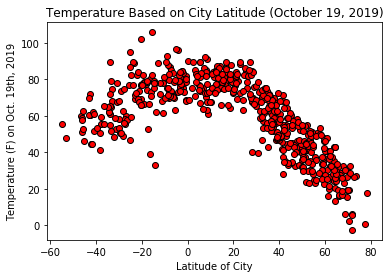

In [19]:
# Scatter plot of latitude and temperature
plt.scatter(cities_cleaned.Lat, cities_cleaned.Temp, marker="o", 
            facecolors="red", edgecolors="black")

# Add labels
plt.title("Temperature Based on City Latitude (October 19, 2019)")
plt.xlabel("Latitude of City")
plt.ylabel("Temperature (F) on Oct. 19th, 2019")

# Save figure
plt.savefig("../output_data/temp_based_on_lat_MOSHER.png")

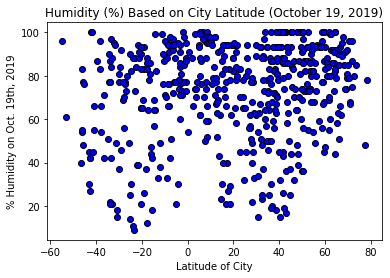

In [20]:
# Scatter plot of latitude and humidity
plt.scatter(cities_cleaned.Lat, cities_cleaned.Humidity, marker="o", 
            facecolors="blue", edgecolors="black")

# Add labels
plt.title("Humidity (%) Based on City Latitude (October 19, 2019)")
plt.xlabel("Latitude of City")
plt.ylabel("% Humidity on Oct. 19th, 2019")

# Save figure
plt.savefig("../output_data/humidity_based_on_lat_MOSHER.png")

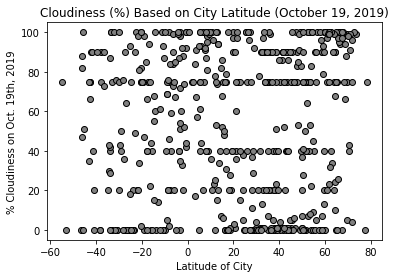

In [21]:
# Scatter plot of latitude and cloudiness
plt.scatter(cities_cleaned.Lat, cities_cleaned.Cloudiness, marker="o", 
            facecolors="gray", edgecolors="black")

# Add labels
plt.title("Cloudiness (%) Based on City Latitude (October 19, 2019)")
plt.xlabel("Latitude of City")
plt.ylabel("% Cloudiness on Oct. 19th, 2019")

# Save figure
plt.savefig("../output_data/cloudiness_based_on_lat_MOSHER.png")

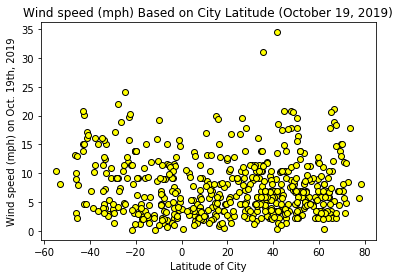

In [22]:
# Scatter plot of latitude and wind speed
plt.scatter(cities_cleaned.Lat, cities_cleaned.Wind_speed, marker="o", 
            facecolors="yellow", edgecolors="black")

# Add Labels
plt.title("Wind speed (mph) Based on City Latitude (October 19, 2019)")
plt.xlabel("Latitude of City")
plt.ylabel("Wind speed (mph) on Oct. 19th, 2019")

# Save figure
plt.savefig("../output_data/wind_speed_based_on_lat_MOSHER.png")